<h1 align="center"> Predicting the Next Crypto Coin/Token Star Using Machine Learning </h1>

<h2 align="center"> Advanced Seminar Information Management </h2>

<h3 align="center"> Supervisor Prof. Dr. Schoder </h3>
  
<h4 align="center"> Pascal Grewe & Andrej Kotsovolos </h4>


<h1>1. Data Collection <h1>

In [10]:
# import free Python Coin Gecko API
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### Coin Data

In [11]:
# get date for each row normal datetime format instead of unix in each cell
# start with input date and add one day with each next row 
def add_date(year, month, day, coin):
    size = int(coin.size/4)
    date = datetime(year, month, day)
    
    for i in range(size):
        coin.iloc[i,3] = date 
        date = date + timedelta(1)

In [12]:
# cut unix datetime from each cell
def cut_date(column, dataframe):
    length = (int(dataframe.size/3))
    df = []

    for i in range(length):
        c = (dataframe[column].iloc[i])
        c.remove(c[0])
        df.append(c)
    
    dataframe[column] = pd.DataFrame.from_dict(df)
    return dataframe[column]

In [13]:
# list all your desired coins here
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche-2", "stellar", "monero"]

In [14]:
# dataframes for prices, volumnes, marketcaps
prices = pd.DataFrame(columns=["a"])
market_caps = pd.DataFrame(columns=["a"])
total_volumes = pd.DataFrame(columns=["a"])

In [15]:
# get coin data for specific coin from 01-01-2018 00:00:00 to 26-04-2022 00:00:00
# start_date and end_date have to be in UNIX format 
def get_coin_data(name, start_date, end_date):
    coin = cg.get_coin_market_chart_range_by_id(id = name, vs_currency='usd', from_timestamp = start_date, to_timestamp=end_date)
    coin = pd.DataFrame.from_dict(coin)
    
    # cut unix date from dataframe
    cut_date('prices', coin)
    cut_date('market_caps', coin)
    cut_date('total_volumes', coin)
    
    # create new column for date
    coin['date'] = 1 
    # enter start date of data y,m,d
    add_date(2018, 1, 1, coin)
    # set date as index
    coin = coin.set_index(coin['date'])
    #drop date column
    coin = coin.drop('date', 1)
    
    ##########
    prices[name + "_prices"] = coin["prices"]
    market_caps[name + "_market_caps"] = coin["market_caps"]
    total_volumes[name + "_total_volumes"] = coin["total_volumes"]
    ##########
    
    coin.to_csv(name + '.csv', index = True)
    
    return coin

In [16]:
# enter list of coins and get csv of them
def all_coins(names, start_date, end_date):
    for i in names:
        get_coin_data(i, start_date, end_date)

In [17]:
# function that reads the csv and sets the index back to date
def read(file_name):
    return pd.read_csv(file_name).set_index('date')

In [20]:
# get all coin data for coins from list for timespan
all_coins(coin_list, '1514761200', '1650924000')

/var/folders/_m/71fq0nk106s02qxvct5s2sv80000gn/T/ipykernel_8042/1213974224.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coin = coin.drop('date', 1)


In [21]:
# delete empty column
prices = prices.drop(columns=["a"])
total_volumes = total_volumes.drop(columns=["a"])
market_caps = market_caps.drop(columns=["a"])

In [22]:
# export csv
prices.to_csv("prices"+ '.csv',index = True)
total_volumes.to_csv("total_volumes"+ '.csv', index = True)
market_caps.to_csv("market_caps"+ '.csv', index = True)

In [23]:
bitcoin = read('bitcoin.csv')

In [24]:
ethereum = read('ethereum.csv')

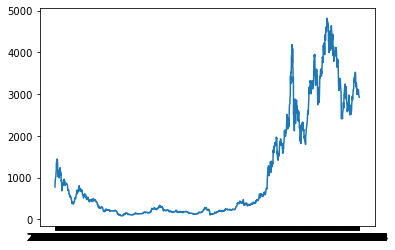

In [25]:
plt.figure()
plt.plot(ethereum['prices'])

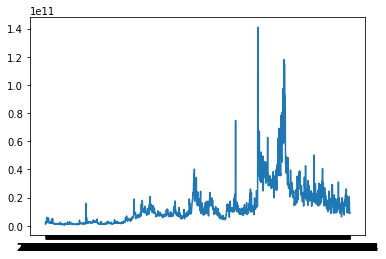

In [26]:
plt.figure()
plt.plot(ethereum['total_volumes'])

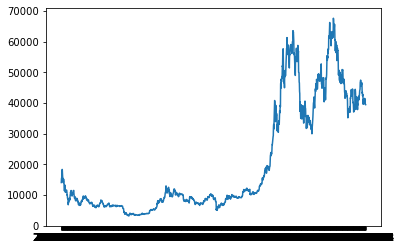

In [27]:
plt.figure()
plt.plot(bitcoin['prices'])

#### OHLC

Open High Low Close (OHLC) Charts zeigen den Eröffnungskurs (Open), den Höchstkurs (High), den tiefsten Kurs (Low) und den Schlusskurs (Close) an.

In [28]:
bitcoin_ohlc = pd.DataFrame.from_dict(cg.get_coin_ohlc_by_id(id = 'bitcoin', vs_currency='usd', days = 'max'))

In [29]:
bitcoin_ohlc

,0,1,2,3,4
0,1367280000000,135.30,141.96,135.30,135.30
1,1367539200000,117.00,117.00,91.01,91.01
2,1367884800000,111.25,118.33,106.40,106.40
3,1368230400000,112.64,118.78,112.64,113.01
4,1368576000000,114.71,117.18,114.16,114.16
...,...,...,...,...,...
861,1652572800000,28913.49,30189.33,28913.49,30189.33
862,1652918400000,31319.31,31319.31,28772.20,28772.20
863,1653264000000,30382.41,30382.41,29256.81,30351.05
864,1653609600000,29163.17,29655.03,29163.17,29346.78


### Asset Platforms

Platform crypto assets could also be called infrastructure blockchains. They are crypto assets which "allow stuff to happen" in the crypto world, the most fundamental enabler of the crypto world.

In [30]:
asset = pd.DataFrame.from_dict(cg.get_asset_platforms())

In [31]:
asset

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
102,,NaN,CoinEx Smart Chain,CSC
103,,NaN,Everscale,
104,conflux,NaN,Conflux,conflux
105,energi,NaN,Energi,


### Contracts

Token contract adress refers to the address location of the actual token contract that manages the logic for the tokens.

### Categories

In [32]:
categories = pd.DataFrame.from_dict(cg.get_coins_categories())

In [33]:
categories

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.100441e+11,4.135044,,[https://assets.coingecko.com/coins/images/279...,9.542938e+10,2022-05-30T19:51:57.403Z
1,smart-contract-platform,Smart Contract Platform,3.934585e+11,5.670289,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.727483e+10,2022-05-30T19:55:39.456Z
2,binance-smart-chain,BNB Chain Ecosystem,2.630371e+11,1.872445,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,6.692499e+10,2022-05-30T19:51:55.151Z
3,polygon-ecosystem,Polygon Ecosystem,2.451927e+11,1.489097,,[https://assets.coingecko.com/coins/images/325...,6.393290e+10,2022-05-30T19:55:23.771Z
4,avalanche-ecosystem,Avalanche Ecosystem,2.381851e+11,1.237042,None,[https://assets.coingecko.com/coins/images/325...,6.261611e+10,2022-05-30T19:55:16.264Z
...,...,...,...,...,...,...,...,...
73,tourism,Tourism,1.153842e+08,1.608062,None,[https://assets.coingecko.com/coins/images/465...,4.055489e+06,2022-05-30T19:51:49.912Z
74,kardiachain-ecosystem,KardiaChain Ecosystem,5.934178e+07,4.410292,,[https://assets.coingecko.com/coins/images/794...,2.034252e+09,2022-05-30T19:51:49.301Z
75,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.257266e+07,5.085822,,[https://assets.coingecko.com/coins/images/215...,2.461138e+05,2022-05-30T19:51:53.688Z
76,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,7.769352e+04,2022-05-30T19:55:36.034Z


In [34]:
categories_list = pd.DataFrame.from_dict(cg.get_coins_categories_list())

In [35]:
categories_list

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
136,xdc-ecosystem,XDC Ecosystem
137,yearn-yfi-partnerships-mergers,Yearn Ecosystem
138,yield-aggregator,Yield Aggregator
139,yield-farming,Yield Farming


### Exchanges

information regarding exchanges

In [36]:
exchange_list = pd.DataFrame.from_dict(cg.get_exchanges_list())

In [37]:
exchange_list

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10,1,425985.074883,425985.074883
1,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,False,10,2,59582.700455,59582.700455
2,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,False,10,3,57728.019477,57728.019477
3,huobi,Huobi Global,2013.0,Seychelles,,https://www.huobi.com,https://assets.coingecko.com/markets/images/25...,False,10,4,54358.772974,54358.772974
4,ftx_spot,FTX,2019.0,Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,False,10,5,54204.917151,54204.917151
...,...,...,...,...,...,...,...,...,...,...,...,...
95,bitcoin_com,FMFW.io,2019.0,Bahamas,The mission of FMFW.io is to empower people fr...,https://fmfw.io/,https://assets.coingecko.com/markets/images/46...,False,6,96,64276.850981,8697.609179
96,coinflex,CoinFLEX,2019.0,Seychelles,,https://coinflex.com/,https://assets.coingecko.com/markets/images/44...,False,6,97,35801.966551,8317.175795
97,uniswap_v2,Uniswap (v2),2018.0,None,,https://app.uniswap.org/#/swap?use=V2,https://assets.coingecko.com/markets/images/53...,False,6,98,3332.498814,3332.498814
98,quoine,Liquid,2014.0,Japan,,https://liquid.com,https://assets.coingecko.com/markets/images/40...,False,6,99,3232.340289,3232.340289


In [38]:
supported_markets = pd.DataFrame.from_dict(cg.get_exchanges_id_name_list())

In [39]:
supported_markets 

,id,name
0,1bch,1BCH
1,aave,Aave
2,aax,AAX
3,aax_futures,AAX Futures
4,abcc,ABCC
...,...,...
620,zilswap,ZilSwap
621,zipmex,Zipmex
622,zipswap,ZipSwap
623,zkswap,ZKSwap (v1)


In [40]:
binance_exchange = cg.get_exchanges_by_id(id = 'binance')

In [41]:
binance_exchange

{'name': 'Binance',
 'year_established': 2017,
 'country': 'Cayman Islands',
 'description': '',
 'url': 'https://www.binance.com/',
 'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
 'facebook_url': 'https://www.facebook.com/binanceexchange',
 'reddit_url': 'https://www.reddit.com/r/binance/',
 'telegram_url': '',
 'slack_url': '',
 'other_url_1': 'https://medium.com/binanceexchange',
 'other_url_2': 'https://steemit.com/@binanceexchange',
 'twitter_handle': 'binance',
 'has_trading_incentive': False,
 'centralized': True,
 'public_notice': '',
 'alert_notice': '',
 'trust_score': 10,
 'trust_score_rank': 1,
 'trade_volume_24h_btc': 425985.0748830454,
 'trade_volume_24h_btc_normalized': 425985.0748830454,
 'tickers': [{'base': 'BUSD',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 1.0007,
   'volume': 667718752.8447087,
   'converted_last': {'btc': 3.257e-05, 'eth

In [42]:
volume_chart = cg.get_exchanges_volume_chart_by_id(id='binance', days = '90')

### Indexes

market indexes

In [43]:
indexes = pd.DataFrame.from_dict(cg.get_indexes())

In [44]:
indexes

,name,id,market,last,is_multi_asset_composite
0,CoinFLEX (Futures) DFN,DFN,CoinFLEX (Futures),NaN,None
1,Perpetual Protocol ZIL,ZIL,Perpetual Protocol,0.110000,None
2,Bibox (Futures) LINK,LINK,Bibox (Futures),0.110000,None
3,CME Bitcoin Futures BTC,BTC,CME Group,0.110000,False
4,Bibox (Futures) XRP,XRP,Bibox (Futures),0.110000,None
5,Bibox (Futures) AXS,AXS,Bibox (Futures),0.110000,None
6,ZBG Futures BSV,BSV,ZBG Futures,0.110000,None
7,MEXC Global (Futures) ATLAS,ATLAS,MEXC Global (Futures),4.543600,None
8,CoinFLEX (Futures) BCHABC,BCHABC,CoinFLEX (Futures),0.000000,None
9,Prime XBT USDC,USDC,Prime XBT,0.000000,None


In [45]:
#indexes_market_id = cg.get_indexes_by_market_id_and_index_id(market_id='binance', id='AAVE')

In [46]:
indexes_list = pd.DataFrame.from_dict(cg.get_indexes_list())

In [47]:
indexes_list

,id,name
0,DFN,CoinFLEX (Futures) DFN
1,ZIL,Perpetual Protocol ZIL
2,LINK,Bibox (Futures) LINK
3,BTC,CME Bitcoin Futures BTC
4,XRP,Bibox (Futures) XRP
...,...,...
2623,DEICPUSDT,.DEICPUSDT
2624,DEMKRUSDT,.DEMKRUSDT
2625,DEYFIIUSDT,.DEYFIIUSDT
2626,DESHIBUSDT,.DESHIBUSDT


### Derivatives

The underlying asset in crypto derivatives trading can be any cryptocurrency token. Two parties that enter into a financial contract speculate on the cryptocurrency’s price on a future date. During the first phase of the contract, the sides agree on a selling/buying price for the cryptocurrency on a specific day, regardless of the market price. As a result, investors can profit from changes in the underlying asset’s price by purchasing the currency at a cheaper price and selling it at a higher price.

In [48]:
derivatives = pd.DataFrame.from_dict(cg.get_derivatives())

In [49]:
derivatives

,market,symbol,index_id,price,price_percentage_change_24h,contract_type,index,basis,spread,funding_rate,open_interest,volume_24h,last_traded_at,expired_at
0,Binance (Futures),BTCUSDT,BTC,30663.14,5.112947,perpetual,30592.263188,0.052535,0.01,0.0100,2.870672e+09,1.198645e+10,1653940337,NaN
1,Prime XBT,BTC/USD,BTC,30573.5,5.143063,perpetual,NaN,0.000000,0.03,0.0000,2.836026e+09,1.741184e+08,1653940352,NaN
2,Bitget Futures,BTCUSDT_UMCBL,BTC,30677.63,5.125122,perpetual,30603.739789,0.000784,0.01,-0.0036,2.688532e+09,5.692249e+09,1653940429,NaN
3,Gate.io (Futures),BTC_USDT,BTC,30633.16,5.184984,perpetual,30614.930000,0.048464,0.01,0.0100,2.243603e+09,9.229158e+08,1653940282,NaN
4,FTX (Derivatives),BTC-PERP,BTC,30578.0,5.115160,perpetual,30581.161620,0.010340,0.01,0.0120,1.873029e+09,2.921376e+09,1653940299,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,FTX (Derivatives),ACB-0624,ACB,1.74,-0.515464,futures,1.744000,0.402994,1.55,0.0000,8.633000e+01,1.534346e+03,1653904886,1.656101e+09
3056,BTCC Futures,LUNA-WEEKLY,LUNA,6.32,-0.178526,futures,6.324500,0.098128,0.19,0.0000,0.000000e+00,0.000000e+00,1653906779,1.654290e+09
3057,FTX (Derivatives),GME-0624,GME,138.59,1.434531,futures,135.975000,-1.886861,2.49,0.0000,NaN,1.337471e+04,1653905866,1.656101e+09
3058,FTX (Derivatives),BITW-0624,BITW,16.11,-0.031037,futures,17.055000,5.898789,5.54,0.0000,NaN,8.260211e+03,1653905625,1.656101e+09


In [50]:
derivative_exchanges = pd.DataFrame.from_dict(cg.get_derivatives_exchanges())

In [51]:
derivative_exchanges

,name,id,open_interest_btc,trade_volume_24h_btc,number_of_perpetual_pairs,number_of_futures_pairs,image,year_established,country,description,url
0,Binance (Futures),binance_futures,257564.32,1629608.87,206,20,https://assets.coingecko.com/markets/images/46...,2019.0,None,,https://www.binance.com/
1,FTX (Derivatives),ftx,167950.34,262248.16,193,93,https://assets.coingecko.com/markets/images/44...,2019.0,Antigua and Barbuda,,https://ftx.com/
2,BTCEX (Futures),btcex_futures,132023.83,186673.71,54,0,https://assets.coingecko.com/markets/images/75...,NaN,None,,https://www.btcex.com/en-us/
3,Bitget Futures,bitget_futures,129522.47,224686.18,55,0,https://assets.coingecko.com/markets/images/59...,NaN,None,,https://www.bitget.com/en/
4,C-Trade,c_trade,123695.67,414.71,6,0,https://assets.coingecko.com/markets/images/61...,2019.0,British Virgin Islands,C-Trade is a next-generation cryptocurrency de...,https://www.c-trade.com
5,BTCC Futures,btcc_futures,113205.09,174911.0,10,20,https://assets.coingecko.com/markets/images/84...,2011.0,None,,https://www.btcc.com/en-US/trade/
6,Prime XBT,prime_xbt,110033.54,6820.69,46,0,https://assets.coingecko.com/markets/images/48...,NaN,Seychelles,PrimeXBT is a technologically advanced Bitcoin...,https://primexbt.com
7,OKX (Futures),okex_swap,100118.66,470932.3,169,248,https://assets.coingecko.com/markets/images/37...,NaN,None,,https://www.okx.com/trade-futures
8,MEXC Global (Futures),mxc_futures,90197.57,126910.12,221,0,https://assets.coingecko.com/markets/images/55...,NaN,None,,https://www.mexc.com/
9,Bybit,bybit,89465.56,274542.43,182,0,https://assets.coingecko.com/markets/images/46...,2018.0,None,"Established in March 2018, Bybit is one of the...",https://www.bybit.com


In [52]:
derivative_exchanges_list = pd.DataFrame.from_dict(cg.get_derivatives_exchanges_list())

In [53]:
derivative_exchanges_list

,id,name
0,binance_futures,Binance (Futures)
1,ftx,FTX (Derivatives)
2,btcex_futures,BTCEX (Futures)
3,bitget_futures,Bitget Futures
4,c_trade,C-Trade
...,...,...
60,bitmart_futures,Bitmart Futures
61,duedex,DueDEX
62,bitflyer_futures,Bitflyer (Futures)
63,perpetual_protocol,Perpetual Protocol


In [54]:
derivative_exchange_id = cg.get_derivatives_exchanges_by_id(id='binance_futures')

In [55]:
derivative_exchange_id

{'name': 'Binance (Futures)',
 'open_interest_btc': 257265.28,
 'trade_volume_24h_btc': '1631652.66',
 'number_of_perpetual_pairs': 206,
 'number_of_futures_pairs': 20,
 'image': 'https://assets.coingecko.com/markets/images/466/small/binance_futures.jpg?1568609512',
 'year_established': 2019,
 'country': None,
 'description': '',
 'url': 'https://www.binance.com/'}

### Exchange Rates

Get BTC-to-Currency exchange rates

In [56]:
exchange_rates = cg.get_exchange_rates()

In [57]:
exchange_rates

{'rates': {'btc': {'name': 'Bitcoin',
   'unit': 'BTC',
   'value': 1.0,
   'type': 'crypto'},
  'eth': {'name': 'Ether', 'unit': 'ETH', 'value': 15.982, 'type': 'crypto'},
  'ltc': {'name': 'Litecoin',
   'unit': 'LTC',
   'value': 458.632,
   'type': 'crypto'},
  'bch': {'name': 'Bitcoin Cash',
   'unit': 'BCH',
   'value': 161.535,
   'type': 'crypto'},
  'bnb': {'name': 'Binance Coin',
   'unit': 'BNB',
   'value': 97.71,
   'type': 'crypto'},
  'eos': {'name': 'EOS', 'unit': 'EOS', 'value': 22707.154, 'type': 'crypto'},
  'xrp': {'name': 'XRP', 'unit': 'XRP', 'value': 76342.413, 'type': 'crypto'},
  'xlm': {'name': 'Lumens',
   'unit': 'XLM',
   'value': 222062.389,
   'type': 'crypto'},
  'link': {'name': 'Chainlink',
   'unit': 'LINK',
   'value': 4276.268,
   'type': 'crypto'},
  'dot': {'name': 'Polkadot',
   'unit': 'DOT',
   'value': 2981.004,
   'type': 'crypto'},
  'yfi': {'name': 'Yearn.finance',
   'unit': 'YFI',
   'value': 3.791,
   'type': 'crypto'},
  'usd': {'name':

### CoinGecko Trending Searches

Top 7 in the last 24 hours

In [58]:
trend = cg.get_search_trending()

In [59]:
trend

{'coins': [{'item': {'id': 'spiceusd',
    'coin_id': 25697,
    'name': 'SpiceUSD',
    'symbol': 'USDS',
    'market_cap_rank': 939,
    'thumb': 'https://assets.coingecko.com/coins/images/25697/thumb/USDS.png?1653440948',
    'small': 'https://assets.coingecko.com/coins/images/25697/small/USDS.png?1653440948',
    'large': 'https://assets.coingecko.com/coins/images/25697/large/USDS.png?1653440948',
    'slug': 'spiceusd',
    'price_btc': 3.282756519877768e-05,
    'score': 0}},
  {'item': {'id': 'carbon-credit',
    'coin_id': 24644,
    'name': 'Carbon Credit',
    'symbol': 'CCT',
    'market_cap_rank': 981,
    'thumb': 'https://assets.coingecko.com/coins/images/24644/thumb/wlURMRLZ_400x400.jpg?1648477454',
    'small': 'https://assets.coingecko.com/coins/images/24644/small/wlURMRLZ_400x400.jpg?1648477454',
    'large': 'https://assets.coingecko.com/coins/images/24644/large/wlURMRLZ_400x400.jpg?1648477454',
    'slug': 'carbon-credit',
    'price_btc': 1.53320491603313e-05,
    

### Global data

In [60]:
#Get cryptocurrency global data
global_data = cg.get_global()

In [61]:
global_data

{'active_cryptocurrencies': 13440,
 'upcoming_icos': 0,
 'ongoing_icos': 49,
 'ended_icos': 3376,
 'markets': 625,
 'total_market_cap': {'btc': 43462025.50862548,
  'eth': 695084001.1471695,
  'ltc': 19933062373.450634,
  'bch': 7022341480.106902,
  'bnb': 4250581197.0100293,
  'eos': 986898922915.4261,
  'xrp': 3318152353782.695,
  'xlm': 9651281200795.617,
  'link': 185920206710.83926,
  'dot': 129661415869.94061,
  'yfi': 164786186.91641045,
  'usd': 1333368962681.6104,
  'aed': 4897504200998.437,
  'ars': 160013177092988.47,
  'aud': 1852636171508.338,
  'bdt': 118718626982376.92,
  'bhd': 502658765027.5661,
  'bmd': 1333368962681.6104,
  'brl': 6339769406862.272,
  'cad': 1688245112099.3235,
  'chf': 1276840785508.7266,
  'clp': 1108762960917892.8,
  'cny': 8881703997318.494,
  'czk': 30586262637946.37,
  'dkk': 9202576571449.896,
  'eur': 1236909051814.336,
  'gbp': 1053484150463.0409,
  'hkd': 10464586293986.701,
  'huf': 488999698706263.44,
  'idr': 1.9392244285922196e+16,
  'i

In [62]:
# Get Top 100 Cryptocurrency Global Eecentralized Finance(defi) data
global_finance = cg.get_global_decentralized_finance_defi()

In [63]:
global_finance

{'defi_market_cap': '48194879702.3190674634787229982',
 'eth_market_cap': '232481247432.6400003612442275968',
 'defi_to_eth_ratio': '20.7306525728632090903035501299142957184113725665653613868536434',
 'trading_volume_24h': '4646493239.4437368414734628536',
 'defi_dominance': '3.6145193904462675189423357280187795671117209486582532420576489',
 'top_coin_name': 'Lido Staked Ether',
 'top_coin_defi_dominance': 16.423176811046854}

### Company

Get public companies bitcoin or ethereum holdings (Ordered by total holdings descending)<br>
Only works for Ethereum and Bitcoin

In [64]:
company_bitcoin = pd.DataFrame.from_dict(cg.get_companies_public_treasury_by_coin_id(coin_id='bitcoin'))

In [65]:
company_bitcoin

,total_holdings,total_value_usd,market_cap_dominance,companies
0,225413.6658,6.912349e+09,1.18,"{'name': 'MicroStrategy Inc.', 'symbol': 'NASD..."
1,225413.6658,6.912349e+09,1.18,"{'name': 'Tesla', 'symbol': 'NASDAQ: TSLA', 'c..."
2,225413.6658,6.912349e+09,1.18,"{'name': 'Galaxy Digital Holdings', 'symbol': ..."
3,225413.6658,6.912349e+09,1.18,"{'name': 'Square Inc.', 'symbol': 'NASDAQ:SQ',..."
4,225413.6658,6.912349e+09,1.18,"{'name': 'Marathon Patent Group', 'symbol': 'N..."
5,225413.6658,6.912349e+09,1.18,"{'name': 'Hut 8 Mining Corp', 'symbol': 'TSX:H..."
6,225413.6658,6.912349e+09,1.18,"{'name': 'Coinbase', 'symbol': 'NASDAQ: COIN',..."
7,225413.6658,6.912349e+09,1.18,"{'name': 'NEXON Co Ltd', 'symbol': 'TYO: 3659'..."
8,225413.6658,6.912349e+09,1.18,"{'name': 'Voyager Digital LTD', 'symbol': 'CSE..."
9,225413.6658,6.912349e+09,1.18,"{'name': 'Riot Blockchain, Inc.', 'symbol': 'N..."


In [66]:
company_ethereum = pd.DataFrame.from_dict(cg.get_companies_public_treasury_by_coin_id(coin_id='ethereum'))

In [67]:
company_ethereum

,total_holdings,total_value_usd,market_cap_dominance,companies
0,63368.0,1.215554e+08,0.05,"{'name': 'Coinbase', 'symbol': 'NASDAQ: COIN',..."
1,63368.0,1.215554e+08,0.05,"{'name': 'Meitu', 'symbol': 'HKG:1357', 'count..."
2,63368.0,1.215554e+08,0.05,"{'name': 'Mogo Inc.', 'symbol': 'NASDAQ:MOGO',..."


# CoinMarketCap

In [68]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-05-30T19:55:50.005Z', 'error_code': 0, 'error_message': None, 'elapsed': 0, 'credit_count': 1, 'notice': None}, 'data': [{'id': 357, 'name': 'wpc7caxhsxp', 'symbol': 'imtm1ezih3l', 'slug': 'jymmm6rk3p', 'cmc_rank': 1547, 'num_market_pairs': 4973, 'circulating_supply': 8420, 'total_supply': 5266, 'max_supply': 4762, 'last_updated': '2022-05-30T19:55:50.005Z', 'date_added': '2022-05-30T19:55:50.005Z', 'tags': ['zwvs8s1p5xo', 'es0en5m4yun', 'q1f3otw5h4', 'efvp2ed0cis', '9dwlg5kn70w', '6nc620jknyj', '3jxzb6cal2a', 'td4qf3mbxn8', 'bsapbt4lucl', '5jwnxsjou8x'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.8183403787221364, 'volume_24h': 1042, 'volume_change_24h': 0.9487625626882521, 'percent_change_1h': 0.1595074835323529, 'percent_change_24h': 0.8152074862855225, 'percent_change_7d': 0.08881472742536034, 'market_cap': 0.4748379883883991, 'market_cap_dominance': 361, 'fully_diluted_ma

In [69]:
url = 

SyntaxError: invalid syntax (201187900.py, line 1)